# Homework Assignment #1

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Police Killings

In [673]:
df = pd.read_csv('../data/police-killings.csv', index_col=[0])

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 14 columns):
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                   467 non-null object
county_income           467 non-null int64
dtypes: int64(4), object(10)
memory usage: 54.7+ KB


In [674]:
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [675]:
df.rename(columns={"lawenforcementagency":"agency", "raceethnicity":"race"}, inplace=True)
df.columns

Index([u'name', u'age', u'gender', u'race', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'agency', u'cause', u'armed',
       u'county_income'],
      dtype='object')

### 2. Show the count of missing values in each column

In [676]:
collist = df.columns
for col in collist:
    print col, ": ", df[col].isnull().sum()

name :  0
age :  0
gender :  0
race :  0
month :  0
day :  0
year :  0
streetaddress :  4
city :  0
state :  0
agency :  0
cause :  0
armed :  0
county_income :  0


### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [677]:
df.fillna('unknown', inplace=True)

### 4. How many killings were there in March and April?

In [678]:
df[ (df['month'] == 'March') | (df['month'] == 'April') ]['month'].count()

210

### 5. How many male and how many female victims are there?

In [679]:
df.groupby("gender")['name'].count()

gender
Female     22
Male      445
Name: name, dtype: int64

### 6. How many killings were of unarmed people?

In [680]:
df[ df['armed'] == 'No']['name'].count()

102

### 7. What percentage of all killings were unarmed?

In [681]:
float(df[ df['armed'] == 'No']['name'].count()) / float(df.shape[0]) * 100

21.841541755888652

### 8. What are the 5 states with the most killings?

In [682]:
df_top5 = df.groupby('state')['name'].count()
df_top5.sort_values(ascending=False, inplace=True)
df_top5.head()

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: name, dtype: int64

### 9. Show a value counts of deaths for each race

In [683]:
df['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

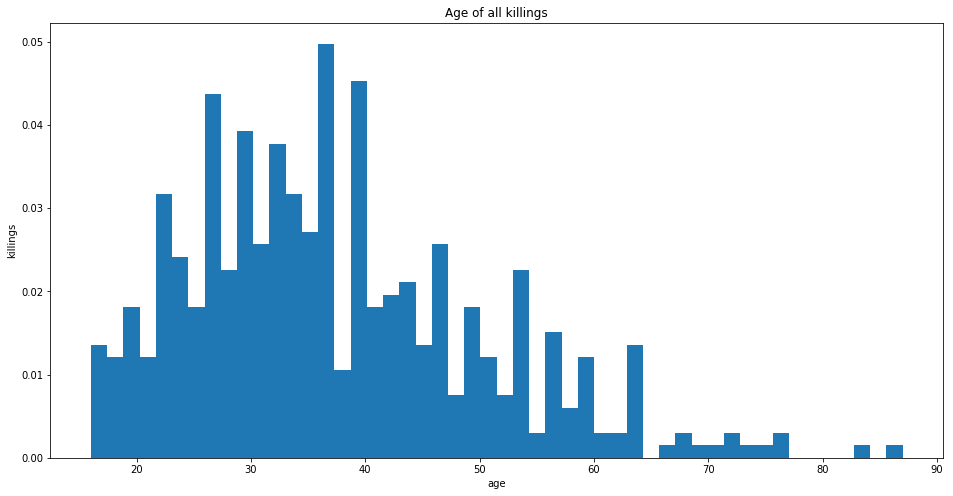

In [684]:
plt.figure(figsize=(16,8))
plt.hist(df['age'], bins=50, normed=1)
plt.title('Age of all killings')
plt.xlabel('age')
plt.ylabel('killings')
#plt.grid(True)
plt.show()

### 11. Show histogram of ages for each race

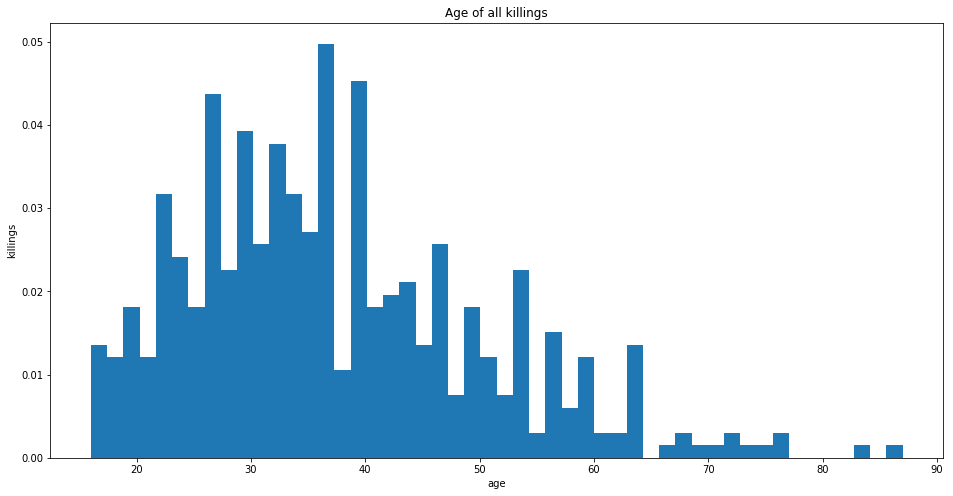

In [685]:
plt.figure(figsize=(16,8))
plt.hist(df['age'], bins=50, normed=1)
plt.title('Age of all killings')
plt.xlabel('age')
plt.ylabel('killings')
#plt.grid(True)
plt.show()

### 12. What is the average age of death by race?

In [686]:
df.groupby('race')['age'].mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

In [687]:
## Create year month for better plotting.
monthname = ['January', 'February', 'March', 'April','May', 'June'] #lazy to type rest of the months
monthnum  = range(1,7) #lazy to type rest of the months

d = dict(zip(monthname,monthnum))

decode_month_to_num = lambda x: d[x]

df['monthnumber'] = df['month'].apply(decode_month_to_num)

df['yearstr'] = df['year'].astype(str)
df['monthnumber'] = df['monthnumber'].astype(str)

df['yearmonth'] = df.yearstr.str.cat(df.monthnumber, sep='-')
df.head(10)

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income,monthnumber,yearstr,yearmonth
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766,2,2015,2015-2
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930,4,2015,2015-4
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930,3,2015,2015-3
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909,3,2015,2015-3
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669,3,2015,2015-3
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596,3,2015,2015-3
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552,3,2015,2015-3
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909,3,2015,2015-3
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310,1,2015,2015-1
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667,2,2015,2015-2


### 13. Show a bar chart with counts of deaths every month

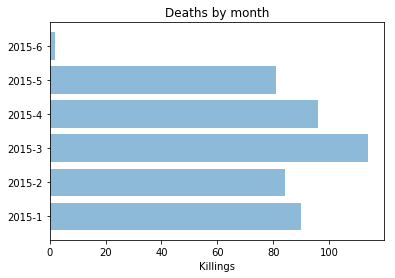

In [688]:
objects = df['yearmonth'].unique()
objects.sort()
y_pos = np.arange(len(objects))
performance = df.groupby('yearmonth')['name'].count()
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Killings')
plt.title('Deaths by month')
 
plt.show()

## Section 2: College Majors

In [689]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [690]:
majors.shape

(173, 11)

### 1. Delete the columns (employed_full_time_year_round, major_code)


In [691]:
majors.drop(['Employed_full_time_year_round', 'Major_code'], axis=1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [692]:
for col in majors.columns:
    print col, majors[col].isnull().sum()
# or



Major 0
Major_category 0
Total 0
Employed 0
Unemployed 0
Unemployment_rate 0
Median 0
P25th 0
P75th 0


### 3. What are the top 10 highest paying majors?

In [693]:
df_highest_paying_major = pd.DataFrame(majors.sort_values(['Median'], ascending=False)[0:10]).reset_index()
df_highest_paying_major.head(50)

,index,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0
1,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
2,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
3,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
4,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
5,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
6,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
7,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0
8,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
9,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


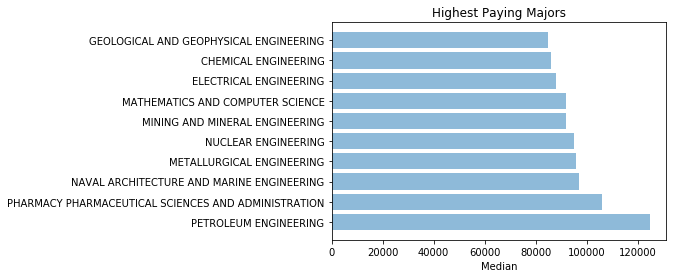

In [694]:
objects = df_highest_paying_major['Major']

y_pos = np.arange(len(objects))
performance = df_highest_paying_major['Median']

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Median')
plt.title('Highest Paying Majors')
 
plt.show()

### 5. What is the average median salary for each major category?

In [695]:
majors.groupby('Major_category')['Median'].mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

In [696]:
df_top_major_cat = pd.DataFrame(majors.groupby('Major_category')['Median'].max())
df_top_major_cat.reset_index(inplace=True)
df_top_major_cat.sort_values(['Median'], ascending=False, inplace=True)
df_top_major_cat.head()

,Major_category,Median
7,Engineering,125000
8,Health,106000
5,Computers & Mathematics,92000
13,Physical Sciences,80000
3,Business,72000


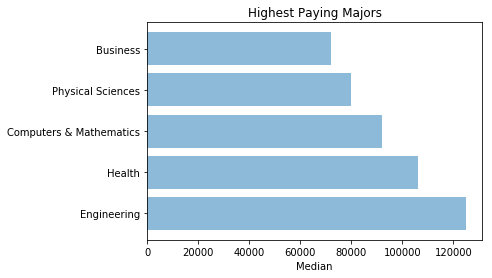

In [697]:
objects = df_top_major_cat['Major_category'][0:5]

y_pos = np.arange(len(objects))
performance = df_top_major_cat['Median'][0:5]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Median')
plt.title('Highest Paying Majors')
 
plt.show()

### 7. Plot a histogram of the distribution of median salaries

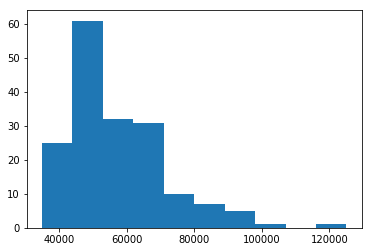

In [698]:
plt.hist(majors['Median'],10)
plt.show()

### 8. Plot a histogram of the distribution of median salaries by major category

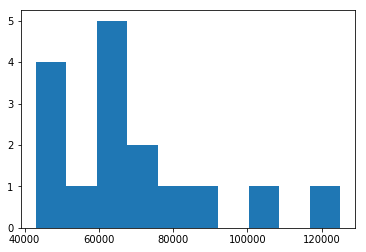

In [699]:
plt.hist(df_top_major_cat['Median'],10)
plt.show()

### 9. What are the top 10 most UNemployed majors?

In [700]:
df_unemp = majors.sort_values(['Unemployment_rate'], ascending=False).reset_index()
df_unemp


,index,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,146,MISCELLANEOUS FINE ARTS,Arts,8511,6431,1190,0.156147,45000,30000,60000.0
1,116,CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,587,0.102712,45000,26100,62000.0
2,93,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,187,0.101796,64000,39750,90000.0
3,27,SCHOOL STUDENT COUNSELING,Education,2396,1492,169,0.101746,41000,33200,50000.0
4,77,LIBRARY SCIENCE,Education,16193,7091,743,0.094843,40000,30000,55000.0
5,141,VISUAL AND PERFORMING ARTS,Arts,55141,41098,4297,0.094658,40000,27000,59000.0
6,19,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,2265,0.090264,60000,40000,85000.0
7,119,SOCIAL PSYCHOLOGY,Psychology & Social Work,10871,6897,660,0.087336,47000,35000,70000.0
8,104,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,320,0.086022,80000,40000,106000.0
9,11,ARCHITECTURE,Engineering,294692,216770,20394,0.085991,63000,40400,93500.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [701]:
df_unemp.groupby('Major_category')['Median'].mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

## Section 3: FIFA Soccer Game data

In [702]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [703]:
fifa.columns

Index([u'Name', u'Nationality', u'National_Position', u'National_Kit', u'Club',
       u'Club_Position', u'Club_Kit', u'Club_Joining', u'Contract_Expiry',
       u'Rating', u'Height', u'Weight', u'Preffered_Foot', u'Birth_Date',
       u'Age', u'Preffered_Position', u'Work_Rate', u'Weak_foot',
       u'Skill_Moves', u'Ball_Control', u'Dribbling', u'Marking',
       u'Sliding_Tackle', u'Standing_Tackle', u'Aggression', u'Reactions',
       u'Attacking_Position', u'Interceptions', u'Vision', u'Composure',
       u'Crossing', u'Short_Pass', u'Long_Pass', u'Acceleration', u'Speed',
       u'Stamina', u'Strength', u'Balance', u'Agility', u'Jumping', u'Heading',
       u'Shot_Power', u'Finishing', u'Long_Shots', u'Curve',
       u'Freekick_Accuracy', u'Penalties', u'Volleys', u'GK_Positioning',
       u'GK_Diving', u'GK_Kicking', u'GK_Handling', u'GK_Reflexes'],
      dtype='object')

In [704]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
Name                  17588 non-null object
Nationality           17588 non-null object
National_Position     1075 non-null object
National_Kit          1075 non-null float64
Club                  17588 non-null object
Club_Position         17587 non-null object
Club_Kit              17587 non-null float64
Club_Joining          17587 non-null object
Contract_Expiry       17587 non-null float64
Rating                17588 non-null int64
Height                17588 non-null object
Weight                17588 non-null object
Preffered_Foot        17588 non-null object
Birth_Date            17588 non-null object
Age                   17588 non-null int64
Preffered_Position    17588 non-null object
Work_Rate             17588 non-null object
Weak_foot             17588 non-null int64
Skill_Moves           17588 non-null int64
Ball_Control          17588 non-null int64
Dribbling      

In [705]:
# build columns dict
coldict = {}
for col in fifa.columns:
    coldict[col] = col.lower()

fifa.rename(columns=coldict, inplace=True)
fifa.head()


,name,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [706]:
#drop columns "national_position", "national_kit", "club_kit", "club_joining", "contract_expiry"] + anything start with gk_
coldroplist = ["national_position", "national_kit", "club_kit", "club_joining", "contract_expiry"]
for col in fifa.columns:
    if col[0:3] == 'gk_': coldroplist.append(col)

coldroplist
        
fifa.drop(coldroplist, axis=1, inplace=True)
fifa.head()

,name,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,...,52,78,25,25,13,16,14,11,47,11


In [707]:
#drop all goal keepers or rating below 70
fifa.drop( ((fifa.preffered_position == 'GK') | (fifa.rating < 70)), axis=0, inplace=True)
fifa.head()

,name,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
2,Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,...,52,78,25,25,13,16,14,11,47,11
5,De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,Right,11/07/1990,26,...,57,67,21,31,13,12,21,19,40,13
6,Robert Lewandowski,Poland,FC Bayern,ST,90,185 cm,79 kg,Right,08/21/1988,28,...,78,84,85,86,91,82,77,76,81,86


In [708]:
extract_data = lambda x : float(x.split(' ')[0])

fifa['height'] = fifa.height.apply(extract_data)
fifa['weight'] = fifa.weight.apply(extract_data)

fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17586 entries, 2 to 17587
Data columns (total 43 columns):
name                  17586 non-null object
nationality           17586 non-null object
club                  17586 non-null object
club_position         17585 non-null object
rating                17586 non-null int64
height                17586 non-null float64
weight                17586 non-null float64
preffered_foot        17586 non-null object
birth_date            17586 non-null object
age                   17586 non-null int64
preffered_position    17586 non-null object
work_rate             17586 non-null object
weak_foot             17586 non-null int64
skill_moves           17586 non-null int64
ball_control          17586 non-null int64
dribbling             17586 non-null int64
marking               17586 non-null int64
sliding_tackle        17586 non-null int64
standing_tackle       17586 non-null int64
aggression            17586 non-null int64
reactions          

In [709]:
fifa.isnull().sum()

name                  0
nationality           0
club                  0
club_position         1
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing             0
long_shots            0
curve                 0
freekick_accuracy     0
penalties       

In [710]:
fifa.dropna(axis=0, how='any', inplace=True)
fifa.isnull().sum()

name                  0
nationality           0
club                  0
club_position         0
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing             0
long_shots            0
curve                 0
freekick_accuracy     0
penalties       

In [711]:
# set name as index
fifa.set_index('name', inplace=True)

In [712]:
fifa

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11
De Gea,Spain,Manchester Utd,GK,90,193.0,82.0,Right,11/07/1990,26,GK,...,57,67,21,31,13,12,21,19,40,13
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,78,84,85,86,91,82,77,76,81,86
Gareth Bale,Wales,Real Madrid,RW,90,183.0,74.0,Left,07/16/1989,27,RW,...,77,85,86,91,87,90,86,85,76,76
Zlatan Ibrahimović,Sweden,Manchester Utd,ST,90,195.0,95.0,Right,10/03/1981,35,ST,...,86,72,80,93,90,88,82,82,91,93
Thibaut Courtois,Belgium,Chelsea,GK,89,199.0,91.0,Left,05/11/1992,24,GK,...,61,68,13,36,14,17,19,11,27,12
Jérôme Boateng,Germany,FC Bayern,Sub,89,192.0,90.0,Right,09/03/1988,28,CB,...,58,75,86,79,34,58,56,31,46,53


### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [713]:
# NEED TO UNDERSTAND MORE HOW TO DO IT.

### 3. Who is the tallest French lefted foot player?

In [714]:
fifa['preffered_foot'] = fifa['preffered_foot'].astype(str)
fifa['preffered_foot'].describe()

count     17585
unique        2
top       Right
freq      13492
Name: preffered_foot, dtype: object

In [715]:

french_player = fifa[ (fifa['nationality'] == 'France') & (fifa['preffered_foot'] == 'Left') ]
french_player[french_player['height'] == french_player.height.max()].index

Index([u'Lucas Mocio'], dtype='object', name=u'name')

### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [716]:

coldict = {}
for col in fifa.columns:
    if (fifa[col].dtype in ['float64', 'int64']): 
        coldict[col] = fifa['rating'].corr(fifa[col])

coldict

s = pd.Series(coldict)
s

acceleration          0.205808
age                   0.458044
aggression            0.404776
agility               0.282798
attacking_position    0.353911
balance               0.087427
ball_control          0.462785
composure             0.613250
crossing              0.401522
curve                 0.420356
dribbling             0.368050
finishing             0.327866
freekick_accuracy     0.399051
heading               0.342954
height                0.047209
interceptions         0.320251
jumping               0.289496
long_pass             0.482898
long_shots            0.419033
marking               0.237608
penalties             0.339417
rating                1.000000
reactions             0.828057
short_pass            0.495954
shot_power            0.441413
skill_moves           0.250971
sliding_tackle        0.216011
speed                 0.223731
stamina               0.355116
standing_tackle       0.249738
strength              0.369214
vision                0.488805
volleys 

### 5. Make a heatmap of the dataset's correlation table

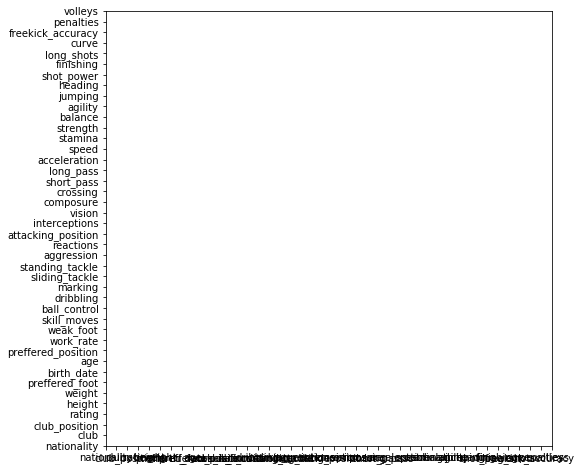

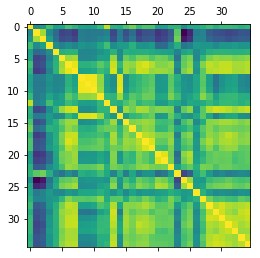

In [717]:
mat = fifa.corr('pearson')

 
    
groups = fifa.columns

plt.figure(figsize=(8,8))
x_pos = np.arange(len(groups)) 
y_pos = np.arange(len(groups))

plt.xticks(x_pos,groups)
plt.yticks(y_pos,groups)
plt.matshow(mat)
 
plt.show()

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [718]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [719]:
fifa2 = fifa[fifa['club'].isin(clubs_list)]
fifa2.head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11
De Gea,Spain,Manchester Utd,GK,90,193.0,82.0,Right,11/07/1990,26,GK,...,57,67,21,31,13,12,21,19,40,13
Robert Lewandowski,Poland,FC Bayern,ST,90,185.0,79.0,Right,08/21/1988,28,ST,...,78,84,85,86,91,82,77,76,81,86


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

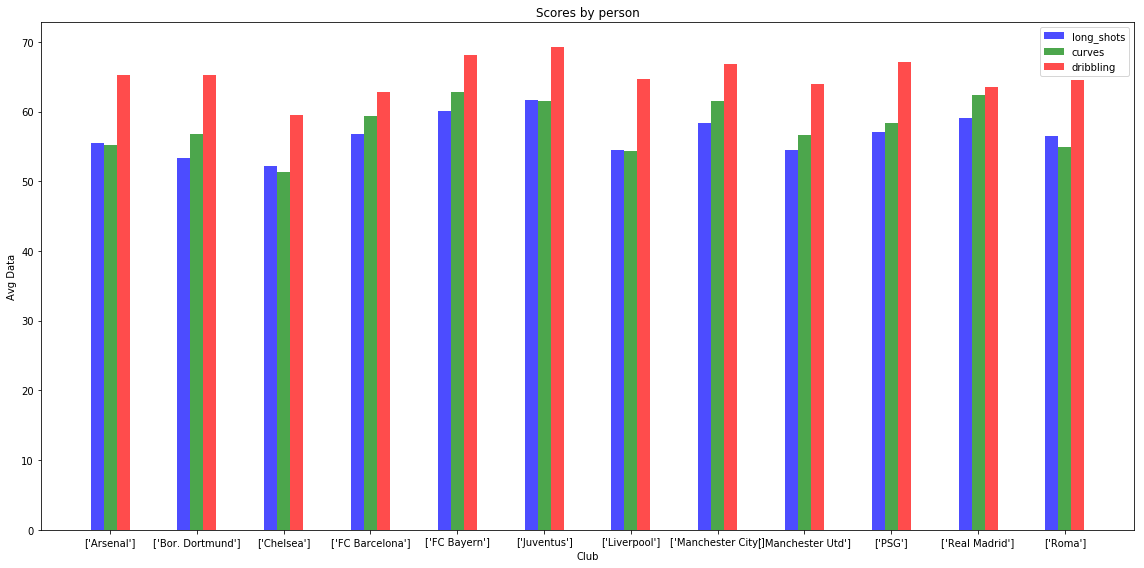

In [720]:

# data to plot
fifa2_by_club = fifa2.groupby('club')

long_shots = fifa2_by_club['long_shots'].mean()
curves = fifa2_by_club['curve'].mean()
dribbling = fifa2_by_club['dribbling'].mean()

n_groups = fifa2_by_club.club.unique().count()

# create plot
plt.figure(figsize=(16,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.7
 
rects1 = plt.bar(index, long_shots, bar_width,
                 alpha=opacity,
                 color='b',
                 label='long_shots')
 
rects2 = plt.bar(index + bar_width, curves, bar_width,
                 alpha=opacity,
                 color='g',
                 label='curves')

rects3 = plt.bar(index + (bar_width * 2), dribbling, bar_width,
                 alpha=opacity,
                 color='r',
                 label='dribbling')

plt.xlabel('Club')
plt.ylabel('Avg Data')
plt.title('Scores by person')
plt.xticks(index + bar_width, fifa2_by_club.club.unique())
plt.legend()
 
plt.tight_layout()
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

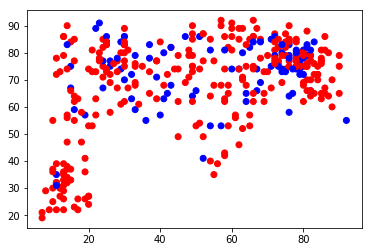

In [721]:
colordict = {'Left':'blue', 'Right':'red'}

plt.scatter(fifa2.marking, fifa2.short_pass, facecolor= fifa2.preffered_foot.apply(lambda x : colordict[x]))
plt.show()